In [20]:
import tensorflow as tf
from keras.layers import Dense, Conv2D
from keras.utils import image_dataset_from_directory
from keras import Sequential
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [21]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [22]:
# Cek apakah GPU tersedia
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Cek detail GPU
gpu_details = tf.config.experimental.list_physical_devices('GPU')
if gpu_details:
    print("GPU Name:", tf.config.experimental.get_device_details(gpu_details[0])['device_name'])
else:
    print("No GPU detected.")

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU Name: Tesla T4


In [23]:
# Set agar hanya menggunakan GPU tanpa fallback ke CPU
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU'), 'GPU')

# Cek apakah model berjalan di GPU
print("Is TensorFlow using GPU?", tf.test.is_built_with_cuda())
print("Device name:", tf.test.gpu_device_name())

Is TensorFlow using GPU? True
Device name: /device:GPU:0


In [ ]:
# drive.mount('/content/drive')

In [ ]:
# !unzip -uq "/content/drive/MyDrive/dataset/planetku/dataset.zip" -d "/content/drive/MyDrive/dataset/planetku/planetku"

In [24]:
# PATH = 'drive/MyDrive/dataset/planetku/planetku'
TRAIN_PATH = '/kaggle/input/dataset/train'
VAL_PATH = '/kaggle/input/dataset/val'
TRAIN_DEST_PATH = '/kaggle/working/converted_train'
VAL_DEST_PATH = '/kaggle/working/converted_val'

In [ ]:
from PIL import Image
import glob
import os



# Create destination directory if it doesn't exist
os.makedirs(TRAIN_DEST_PATH, exist_ok=True)

# Iterate through all files and subdirectories in the dataset path
for img_path in glob.glob(os.path.join(TRAIN_PATH, "*", "*")):  # This will enter each class folder
    if os.path.isfile(img_path):  # Check if it's a file (not a directory)
        try:
            # Open the image and convert to RGB
            with Image.open(img_path) as img:
                # Generate a destination path within the writable directory
                subfolder = os.path.basename(os.path.dirname(img_path))
                dest_subfolder = os.path.join(TRAIN_DEST_PATH, subfolder)
                os.makedirs(dest_subfolder, exist_ok=True)

                # Save the converted image
                dest_path = os.path.join(dest_subfolder, os.path.basename(img_path))
                img.convert("RGB").save(dest_path, "JPEG")

        except Exception as e:
            print(f"Error converting {img_path}: {e}")
    else:
        print(f"Skipped directory: {img_path}")


In [ ]:
from PIL import Image
import glob
import os



# Create destination directory if it doesn't exist
os.makedirs(VAL_DEST_PATH, exist_ok=True)

# Iterate through all files and subdirectories in the dataset path
for img_path in glob.glob(os.path.join(VAL_PATH, "*", "*")):  # This will enter each class folder
    if os.path.isfile(img_path):  # Check if it's a file (not a directory)
        try:
            # Open the image and convert to RGB
            with Image.open(img_path) as img:
                # Generate a destination path within the writable directory
                subfolder = os.path.basename(os.path.dirname(img_path))
                dest_subfolder = os.path.join(VAL_DEST_PATH, subfolder)
                os.makedirs(dest_subfolder, exist_ok=True)

                # Save the converted image
                dest_path = os.path.join(dest_subfolder, os.path.basename(img_path))
                img.convert("RGB").save(dest_path, "JPEG")

        except Exception as e:
            print(f"Error converting {img_path}: {e}")
    else:
        print(f"Skipped directory: {img_path}")


In [ ]:
# TRAIN_DEST_PATH = '/kaggle/working/converted_images'
# training_dataset, validation_dataset = image_dataset_from_directory(

#         directory=TRAIN_DEST_PATH,

#         image_size=(150, 150),

#         batch_size=128,

#         label_mode='categorical',

#         validation_split=0.1,

#         subset='both',

#         seed=42,

#         interpolation='nearest'

#     )

In [25]:
IMG_SIZE = (150, 150)  # Ukuran input gambar untuk ResNet50
NUM_CLASSES = 10  # Jumlah kelas yang ingin diklasifikasi
BATCH_SIZE = 32
EPOCHS = 100

In [ ]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1.0/255,
#     rotation_range=20,
#     shear_range=0.2,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

# train_generator = train_datagen.flow_from_directory(
#     TRAIN_DEST_PATH, 
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='categorical'
# )
# val_generator = val_datagen.flow_from_directory(
#     VAL_DEST_PATH, 
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='categorical'
# )



In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.25],
    fill_mode='constant',
    rotation_range=30,
    width_shift_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    fill_mode='constant'
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    VAL_DEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=42
)

Found 8473 images belonging to 10 classes.
Found 2276 images belonging to 10 classes.


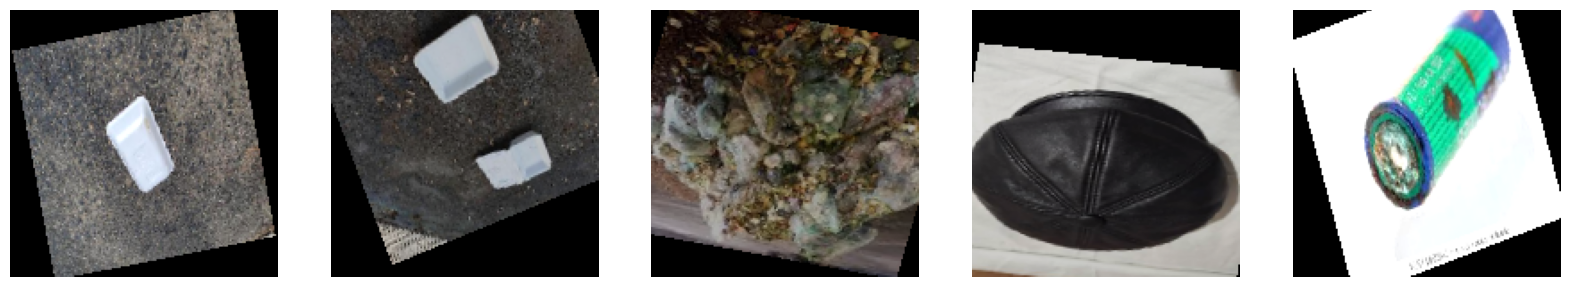

In [42]:
batch_images, batch_labels = next(train_generator)

batch_images = (batch_images * 255).astype(np.uint8)

plt.figure(figsize=(20, 10))
for i in range(5):
    img_aug = batch_images[i]
    plt.subplot(1, 5, i+1)
    plt.imshow(img_aug)
    plt.axis('off')

plt.show()

In [ ]:
# data_augmentation = Sequential([

#     tf.keras.layers.Input(shape=(150, 150, 3)),

#     tf.keras.layers.RandomFlip('horizontal'),

#     tf.keras.layers.RandomRotation(0.4),

# ])



# training_dataset = training_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# len(train_generator.class_names)

In [43]:
pre_trained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    input_shape=(150, 150, 3),
)



pre_trained_model.trainable = False

In [44]:
pre_trained_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 40, 40,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 38, 38,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [45]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):

        if logs['accuracy']>=0.99 and logs['val_accuracy'] > 0.95:

            self.model.stop_training = True

            print("\nReached 99% accuracy so cancelling training!")

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6)

callback = [
    EarlyStoppingCallback(),
    lr_scheduler
]

In [ ]:
# try:

#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Automatically detects TPU

#     tf.config.experimental_connect_to_cluster(tpu)

#     tf.tpu.experimental.initialize_tpu_system(tpu)

#     strategy = tf.distribute.TPUStrategy(tpu)

#     print("TPU connected successfully")

# except ValueError:

#     print("No TPU found. Please enable TPU in Runtime > Change runtime type.")

In [ ]:
# combined_model = tf.keras.Sequential([

#     data_augmentation,

#     pre_trained_model  # Pre-trained model loaded here

# ])



# # Extract output from the pre-trained model (assuming it's the last layer)

# last_output = combined_model.layers[-1].output

In [46]:
# with strategy.scope():
from tensorflow.keras.optimizers import Adam

strategy = tf.distribute.MirroredStrategy()

print("Jumlah GPU tersedia:", strategy.num_replicas_in_sync)

with strategy.scope():
    last_output = pre_trained_model.output
    x = tf.keras.layers.Flatten()(last_output)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Define the model with input and output layers specified
    
    model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)
    # Compile the model
    
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
print("Devices yang digunakan:", tf.config.list_logical_devices('GPU'))

Jumlah GPU tersedia: 2
Devices yang digunakan: [LogicalDevice(name='/device:GPU:0', device_type='GPU'), LogicalDevice(name='/device:GPU:1', device_type='GPU')]


In [ ]:
# model = tf.keras.models.Sequential([

#         tf.keras.Input(shape=(150, 150, 3)),

#         tf.keras.layers.Rescaling(1./255),

#         tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Flatten(),



#         tf.keras.layers.Dense(512, activation='relu'),

#         tf.keras.layers.Dense(10, activation='sigmoid')

#     ])





# model.compile(

#         optimizer='Adam',

#         loss='categorical_crossentropy',

#         metrics=['accuracy']

# 	)

In [47]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs=100,
    verbose=2,
    callbacks = callback
)

Epoch 1/100
265/265 - 74s - 277ms/step - accuracy: 0.5705 - loss: 2.0784 - val_accuracy: 0.7188 - val_loss: 0.9611 - learning_rate: 1.0000e-04
Epoch 2/100
265/265 - 58s - 219ms/step - accuracy: 0.6757 - loss: 1.0880 - val_accuracy: 0.7188 - val_loss: 1.0455 - learning_rate: 1.0000e-04
Epoch 3/100
265/265 - 58s - 220ms/step - accuracy: 0.6939 - loss: 1.0044 - val_accuracy: 0.7381 - val_loss: 0.8971 - learning_rate: 1.0000e-04
Epoch 4/100
265/265 - 58s - 220ms/step - accuracy: 0.6993 - loss: 0.9686 - val_accuracy: 0.7548 - val_loss: 0.8162 - learning_rate: 1.0000e-04
Epoch 5/100
265/265 - 58s - 219ms/step - accuracy: 0.7118 - loss: 0.9016 - val_accuracy: 0.7408 - val_loss: 0.8787 - learning_rate: 1.0000e-04
Epoch 6/100
265/265 - 58s - 221ms/step - accuracy: 0.7373 - loss: 0.8505 - val_accuracy: 0.7671 - val_loss: 0.7666 - learning_rate: 1.0000e-04
Epoch 7/100
265/265 - 58s - 220ms/step - accuracy: 0.7378 - loss: 0.8681 - val_accuracy: 0.7750 - val_loss: 0.7517 - learning_rate: 1.0000e-04

In [ ]:
# import os

# from PIL import Image



# def remove_non_images(directory):

#     for root, _, files in os.walk(directory):

#         for file in files:

#             file_path = os.path.join(root, file)

#             try:

#                 # Try to open the file as an image

#                 img = Image.open(file_path)

#                 img.verify()  # Check if it's a valid image

#             except (IOError, SyntaxError):

#                 # If not a valid image, delete the file

#                 print(f"Removing invalid image file: {file_path}")

#                 os.remove(file_path)



# # Run the function on your dataset directory

# remove_non_images(PATH)

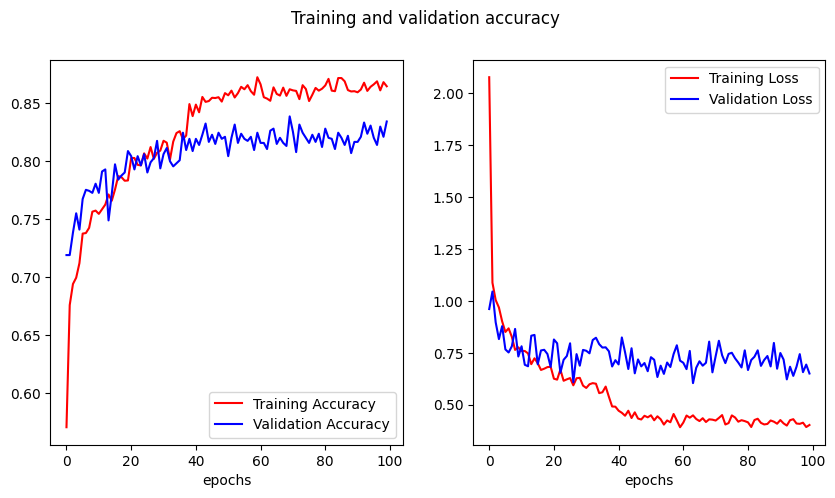

In [48]:
# Get training and validation accuracies

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']



# Get number of epochs

epochs = range(len(acc))



fig, ax = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Training and validation accuracy')



for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):

    ax[i].plot(epochs, data[0], 'r', label="Training " + label)

    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)

    ax[i].legend()

    ax[i].set_xlabel('epochs')



plt.show()

In [ ]:
model.save("model98.h5")

In [ ]:
model2 = model = tf.keras.models.load_model('/kaggle/working/model98.h5')

In [ ]:
class_names  = ['battery', 'cardboard', 'clothes', 'glass', 'metal', 'organic', 'paper', 'plastic', 'shoes', 'styrofoam']

In [ ]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
def predict_image_from_url(url):

    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((150, 150))
    
   
    img_array = np.array(img) / 255.0
    
   
    img_array = np.expand_dims(img_array, axis=0)
    
   
    predictions = model2.predict(img_array)
    
    
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class]
    confidence = predictions[0][predicted_class]
    
    return predicted_class_name, confidence

In [ ]:
url = 'https://cdn-brilio-net.akamaized.net/webp/news/2022/12/20/244361/1200xauto-cara-simpel-membuang-pecahan-kaca-ke-tong-sampah-bikin-tangan-terhindar-dari-luka-2212205.jpg'
predicted_class, confidence = predict_image_from_url(url)
print(f'Predicted class: {predicted_class} with confidence {confidence:.2f}')